# Task 2: Develop Time Series Forecasting Models

In [1]:
# import libraries and and configurations
import sys, os
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_processing
import forecasting

#### Loading the data

In [2]:
# Load the data
df = pd.read_csv("../data/TSLA.csv", parse_dates=["Date"], index_col="Date")
# Display the first few rows of the dataframe
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-07-01,18.073999,18.174667,17.856667,17.943333,31518000
2015-07-02,18.680000,18.830000,18.220667,18.667999,107458500
2015-07-06,18.591999,18.779333,18.420000,18.648001,61828500
2015-07-07,18.333332,18.346666,17.384666,17.858667,91576500
2015-07-08,17.288000,17.386667,16.954000,16.997334,93316500


#### Preprocessing the data
- Fill missing values
- Normalize the data

In [3]:
importlib.reload(data_processing)
from data_processing import clean_and_normalize

In [4]:
clean_df = clean_and_normalize(df)
# Display the number of missing values in each column
missing_values = clean_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/data_processing.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='ffill', inplace=True)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/data_processing.py:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[c

#### Splitting the data into training and testing sets

In [5]:
from forecasting import chronological_split

2015-07-01 00:00:00 -> 2023-12-29 00:00:00 | Train size: 2140
2024-01-02 00:00:00 -> 2025-07-30 00:00:00 | Test size: 395


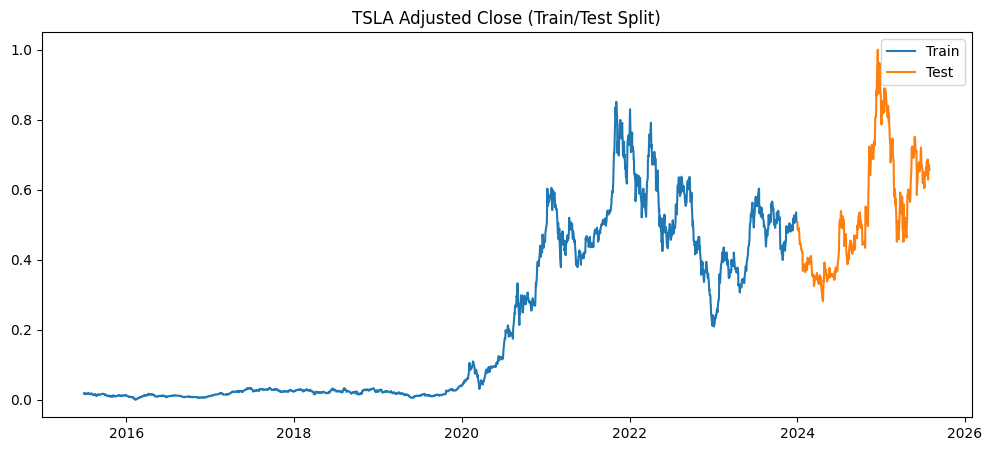

In [6]:
tsla = clean_df.sort_index()
SPLIT_DATE = "2023-12-31"
y = tsla["Close"].astype(float)

y_train, y_test = chronological_split(y, split_date=SPLIT_DATE)
print(y_train.index.min(), "->", y_train.index.max(), "| Train size:", len(y_train))
print(y_test.index.min(),  "->", y_test.index.max(),  "| Test size:", len(y_test))

plt.figure(figsize=(12,5))
plt.plot(y_train, label="Train")
plt.plot(y_test, label="Test")
plt.title("TSLA Adjusted Close (Train/Test Split)")
plt.legend(); plt.show()

#### ARIMA: Auto-fit, Forecast, Metrics

In [7]:
# load the modules
importlib.reload(data_processing)
from forecasting import (fit_arima, forecast_arima, plot_arima)

/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

ARIMA metrics: {'MAE': 0.13389406628659778, 'RMSE': np.float64(0.165827416139461), 'MAPE': np.float64(25.121380419935047)}


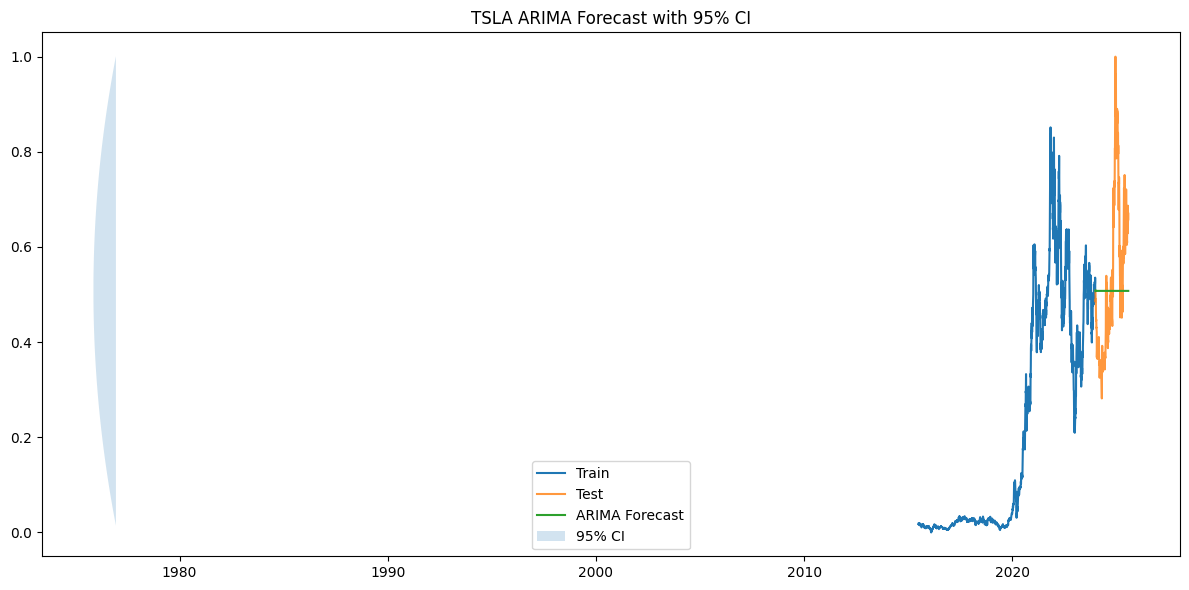

In [8]:
arima_model = fit_arima(y_train, order=(5,1,2))
arima_res = forecast_arima(arima_model, y_test)

print("ARIMA metrics:", arima_res.metrics)
plot_arima(y_train, y_test, arima_res, title="TSLA ARIMA Forecast with 95% CI")